In [6]:
!pip install ucimlrepo 

ERROR: Could not find a version that satisfies the requirement xelatex (from versions: none)
ERROR: No matching distribution found for xelatex


In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes)  
x_unsanitized = heart_disease.data.features 
y_unsanitized = heart_disease.data.targets 

#check for missing values and if the data contains the same amount of rows in x and y
print("double check features length",len(x_unsanitized))
print("double check targets length",len(y_unsanitized))
print('missing features=', x_unsanitized.isnull().sum())
print('missing targets=',y_unsanitized.isnull().sum())


double check features length 303
double check targets length 303
missing features= age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64
missing targets= num    0
dtype: int64


In [24]:
import pandas as pd


#Merge the dataframe so it is easier to sanitize without messing up the indexes
X_df = pd.DataFrame(x_unsanitized, columns=heart_disease.feature_names)
y_series = pd.Series(y_unsanitized["num"], name="target")

# Merge X and y
merged_df= pd.concat([x_unsanitized, y_series], axis=1)
merged_df
# Now, merged_df contains both features and targets


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [9]:
merged_df.describe()

#there seem to be missing values in ca and thal

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [10]:
#remove incomplete values because there are only very few missing values

print(merged_df.isnull().sum())
cleaned_df = merged_df.dropna()
print(cleaned_df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [11]:
cleaned_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


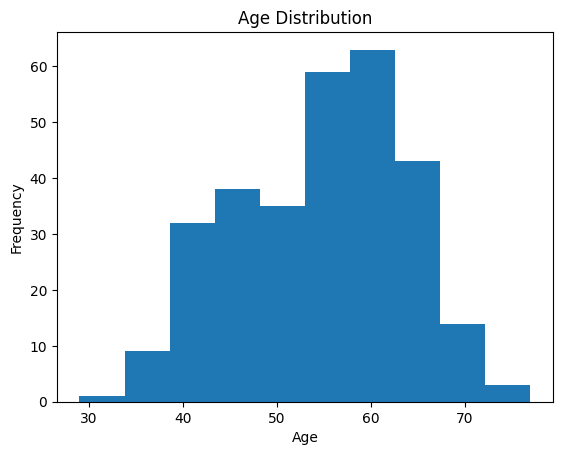

In [26]:
import matplotlib.pyplot as plt

plt.hist(cleaned_df['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

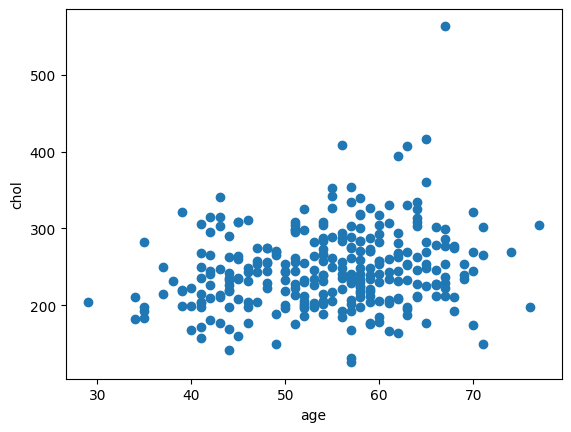

In [28]:
import matplotlib.pyplot as plt

plt.scatter(cleaned_df["age"], cleaned_df["chol"])
plt.xlabel("age")
plt.ylabel("chol")
plt.show()

In [79]:
malecount = 0
femalecount = 0

for sex in cleaned_df["sex"]:
    if sex:
        #male
        malecount+=1
    else:
        femalecount+= 1

print("males: ", malecount, "females: ", femalecount)

#seems like there are much more males than females


males:  201 females:  96


In [14]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X = cleaned_df.drop('target', axis=1)
y = cleaned_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
print(X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
286   58    0   4       170   225    1        2      146      1      2.8   
81    53    0   4       130   264    0        2      143      0      0.4   
109   39    1   4       118   219    0        0      140      0      1.2   
147   41    1   3       112   250    0        0      179      0      0.0   
220   41    0   3       112   268    0        2      172      1      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
254   43    1   4       115   303    0        0      181      0      1.2   
195   67    1   4       100   299    0        2      125      1      0.9   
118   63    1   4       130   330    1        2      132      1      1.8   
47    50    1   4       150   243    0        2      128      0      2.6   
174   64    1   4       145   212    0        2      132      0      2.0   

     slope   ca  thal  
286      2  2.0   6.0  
81       2  0.0   3.0  
109      2  0.0

In [16]:
print(y_train)

286    2
81     0
109    3
147    0
220    0
      ..
254    0
195    3
118    3
47     4
174    4
Name: target, Length: 237, dtype: int64


In [92]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression, LassoCV, RidgeClassifier, SGDOneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

#define models list of models we want to compare
models = {
    'Logistic Regression (baseline)': LogisticRegression(max_iter=100000, random_state=0),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=0),
    'Ada Boosting Classifier': AdaBoostClassifier(random_state=0),
    'Random Forest Classifier': RandomForestClassifier(random_state=0, n_estimators=10),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=0),
    'Bagging Classifier': BaggingClassifier(random_state=0),
    'Ridge Classifier': RidgeClassifier(random_state=0),
    'KNeighbors Classifier': KNeighborsClassifier()
}

#results object to be used as a dict
results = {}


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    #I also tried to use regression models as classifiers by rounding the result to see what would happen
    #mse = mean_squared_error(y_test, np.round(y_pred))
    #r2 = r2_score(y_test, y_pred)
    results[model_name] = accuracy
    #results[model_name] = (accuracy, mse, r2)



#show results sorted by accuracy
for model_name, accuracy in sorted(results.items(), key=lambda item: item[1], reverse=True):
    print(f'{model_name}:', "Accuracy: {:.2f}%".format(accuracy * 100))
    #print(f'Mean Squared Error: {mse}')
    #print(f'R-squared (R2) Score: {r2}\n')
    

Logistic Regression (baseline): Accuracy: 58.33%
Random Forest Classifier: Accuracy: 56.67%
Ridge Classifier: Accuracy: 55.00%
MLP Classifier: Accuracy: 55.00%
Gradient Boosting Classifier: Accuracy: 53.33%
Bagging Classifier: Accuracy: 53.33%
Ada Boosting Classifier: Accuracy: 48.33%
Decision Tree Classifier: Accuracy: 48.33%
KNeighbors Classifier: Accuracy: 48.33%


## GenAI usage

#### used prompts:
- pandas remove unnamed colums
- add pd series to dataframe
- split dataframe into X and Y
- round all results from model.predict python
- sklearn MLPClassifier example
- How to run streamlit in a jupyter notebook?
- How do streamlit controls work python
- How do I plot the following data? age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal	target
count	297.000000	297.000000	297.000000	297.000000	297.000000	297.000000	297.000000	297.000000	297.000000	297.000000	297.000000	297.000000	297.000000	297.000000
mean	54.542088	0.676768	3.158249	131.693603	247.350168	0.144781	0.996633	149.599327	0.326599	1.055556	1.602694	0.676768	4.730640	0.946128
std	9.049736	0.468500	0.964859	17.762806	51.997583	0.352474	0.994914	22.941562	0.469761	1.166123	0.618187	0.938965	1.938629	1.234551
min	29.000000	0.000000	1.000000	94.000000	126.000000	0.000000	0.000000	71.000000	0.000000	0.000000	1.000000	0.000000	3.000000	0.000000
25%	48.000000	0.000000	3.000000	120.000000	211.000000	0.000000	0.000000	133.000000	0.000000	0.000000	1.000000	0.000000	3.000000	0.000000
50%	56.000000	1.000000	3.000000	130.000000	243.000000	0.000000	1.000000	153.000000	0.000000	0.800000	2.000000	0.000000	3.000000	0.000000
75%	61.000000	1.000000	4.000000	140.000000	276.000000	0.000000	2.000000	166.000000	1.000000	1.600000	2.000000	1.000000	7.000000	2.000000
max	77.000000	1.000000	4.000000	200.000000	564.000000	1.000000	2.000000	202.000000	1.000000	6.200000	3.000000	3.000000	7.000000	4.000000
- python how do I make the parameters of this code adjustable? models = {
    'Logistic Regression (baseline)': LogisticRegression(max_iter=100000, random_state=0),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=0),
    'Ada Boosting Classifier': AdaBoostClassifier(random_state=0),
    'Random Forest Classifier': RandomForestClassifier(random_state=0),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=0),
    'Bagging Classifier': BaggingClassifier(random_state=0),
    'Ridge Classifier': RidgeClassifier(random_state=0),
    'KNeighbors Classifier': KNeighborsClassifier()
}
- <b>some other prompts that are not very relevant and hard to include because of formatting</b>

## finished streamlit app
https://github.com/nexon33/Task2ML/tree/main

https://task2ml-cchhp2kkcxcvzjkyjbydyv.streamlit.app/